# PRODIGY_DS_02:-
Perform data cleaning and exploratory data analysis (EDA) on a dataset of your choice, such as Titanic dataset from Kaggle. Explain relationships between variables and identity patterns and trends in the data.

In [1]:
#Importing the required python libraries.
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#Importing the TITANIC dataset and reading it.
data=pd.read_excel(r'/content/Titanic Dataset.xlsx')

In [3]:
#Viewing first 5 records in the titanic dataset
data.head()

,Survived,Pclass,Gender,Age,Family,Fare,Embarked
0,No,Third class,Male,22.0,1,7.2500,Southampton
1,Yes,First class,Female,38.0,1,71.2833,Cherbourg
2,Yes,Third class,Female,26.0,0,7.9250,Southampton
3,Yes,First class,Female,35.0,1,53.1000,Southampton
4,No,Third class,Male,35.0,0,8.0500,Southampton


In [20]:
#Viewing last 5 records in the dataset
data.tail()

,Survived,Pclass,Gender,Age,Family,Fare,Embarked
707,No,Third class,Female,39.0,5,29.125,Queesntown
708,No,Second Class,Male,27.0,0,13.000,Southampton
709,Yes,First class,Female,19.0,0,30.000,Southampton
710,Yes,First class,Male,26.0,0,30.000,Cherbourg
711,No,Third class,Male,32.0,0,7.750,Queesntown


In [4]:
#Checking the info and description of the dataset
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 712 entries, 0 to 711
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  712 non-null    object 
 1   Pclass    712 non-null    object 
 2   Gender    712 non-null    object 
 3   Age       712 non-null    float64
 4   Family    712 non-null    int64  
 5   Fare      712 non-null    float64
 6   Embarked  712 non-null    object 
dtypes: float64(2), int64(1), object(4)
memory usage: 39.1+ KB


In [5]:
#Getting the basic statistics of the dataset.
data.describe()

,Age,Family,Fare
count,712.000000,712.000000,712.000000
mean,29.644663,0.946629,34.567251
std,14.487814,1.485027,52.938648
min,1.000000,0.000000,0.000000
25%,20.000000,0.000000,8.050000
50%,28.000000,0.000000,15.645850
75%,38.000000,1.000000,33.000000
max,80.000000,7.000000,512.329200


In [7]:
#Performing Data Cleaning
#Check if there are any null or missing values
data.isna().sum()

Survived    0
Pclass      0
Gender      0
Age         0
Family      0
Fare        0
Embarked    0
dtype: int64

**Observation from Data Cleaning:-** We observe that there are no missing values and null values so we can proceed with EDA i.e., Exploratory Data Analysis.

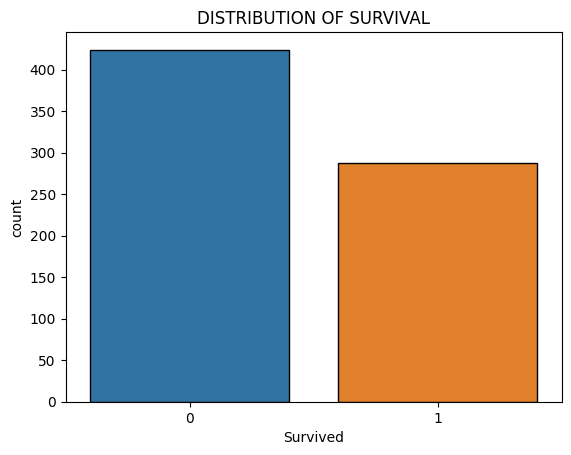

In [35]:
#Exploratory Data Analysis
#Plot the countplot for distribution of "Survival"
sns.countplot(data=data,x='Survived',edgecolor="black")
plt.title("DISTRIBUTION OF SURVIVAL")
plt.show()

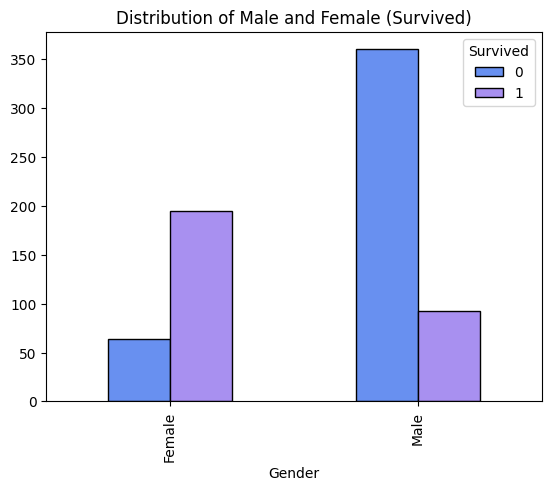

In [46]:
#Lets see how many male and female survived
counts = data.groupby(['Gender', 'Survived']).size().unstack()
colors = ['#6890F0','#A890F0']
counts.plot(kind="bar",color=colors,edgecolor='black')
plt.title("Distribution of Male and Female (Survived)")
plt.show()

Observation:-We can observe that female survived more than male.

In [11]:
#Replacing Yes and No into 1 and 0 to find the rate of the people who survived
data= data.replace({'Survived':{'Yes':1,'No':0}})
data

,Survived,Pclass,Gender,Age,Family,Fare,Embarked,AgeGroup
0,0,Third class,Male,22.0,1,7.2500,Southampton,Young Adult
1,1,First class,Female,38.0,1,71.2833,Cherbourg,Adult
2,1,Third class,Female,26.0,0,7.9250,Southampton,Young Adult
3,1,First class,Female,35.0,1,53.1000,Southampton,Adult
4,0,Third class,Male,35.0,0,8.0500,Southampton,Adult
...,...,...,...,...,...,...,...,...
707,0,Third class,Female,39.0,5,29.1250,Queesntown,Adult
708,0,Second Class,Male,27.0,0,13.0000,Southampton,Young Adult
709,1,First class,Female,19.0,0,30.0000,Southampton,Young Adult
710,1,First class,Male,26.0,0,30.0000,Cherbourg,Young Adult


In [14]:
# Calculate the survival rate by age group
data['AgeGroup'] = pd.cut(data['Age'], bins=[0, 18, 30, 50, 80], labels=['Child', 'Teenager', 'Adult', 'Senior'])
survival_by_agegroup = data.groupby('AgeGroup')['Survived'].mean()
print(survival_by_agegroup)

AgeGroup
Child       0.503597
Teenager    0.355556
Adult       0.420833
Senior      0.333333
Name: Survived, dtype: float64


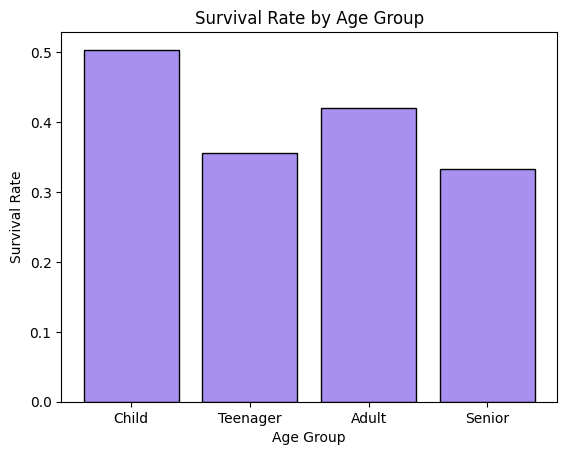

In [48]:
# Plot a bargraph for survival rate by age group
plt.bar(survival_by_agegroup.index, survival_by_agegroup.values,
             color='#A890F0',edgecolor='black')
plt.xlabel('Age Group')
plt.ylabel('Survival Rate')
plt.title('Survival Rate by Age Group')
plt.show()


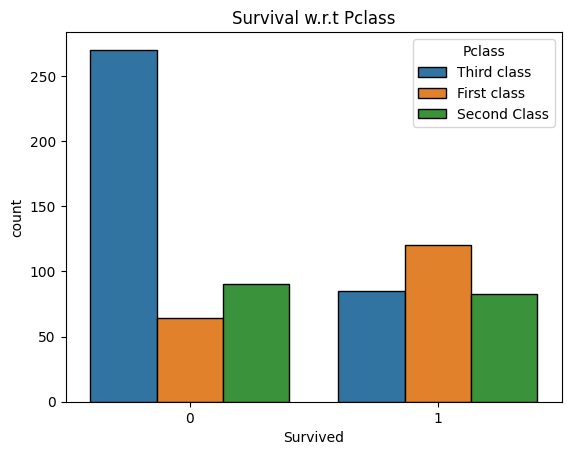

In [52]:
#Distribution of "Survival" with respect to the "Pclass"
sns.countplot(data=data,x='Survived',hue='Pclass',edgecolor='black')
plt.title("Survival w.r.t Pclass")
plt.show()

Observation:-We observe that mostly Class Three people did not survive.

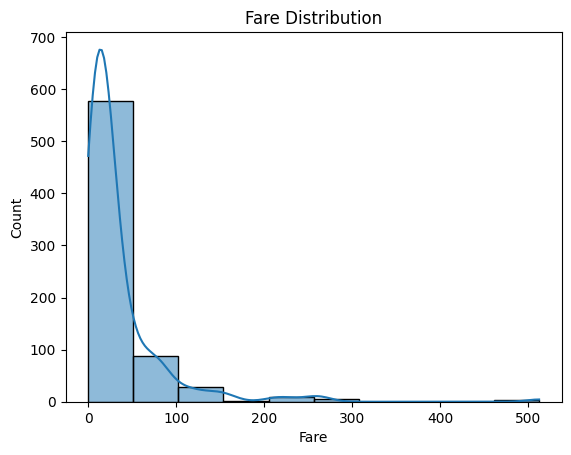

In [33]:
#Lets see the histogram of the entire dataset
sns.histplot(data['Fare'], bins=10,kde=True)
plt.title('Fare Distribution')
plt.show()

Observation:-We observe that the Feature 'Fare' is Positively skewed in the plot .

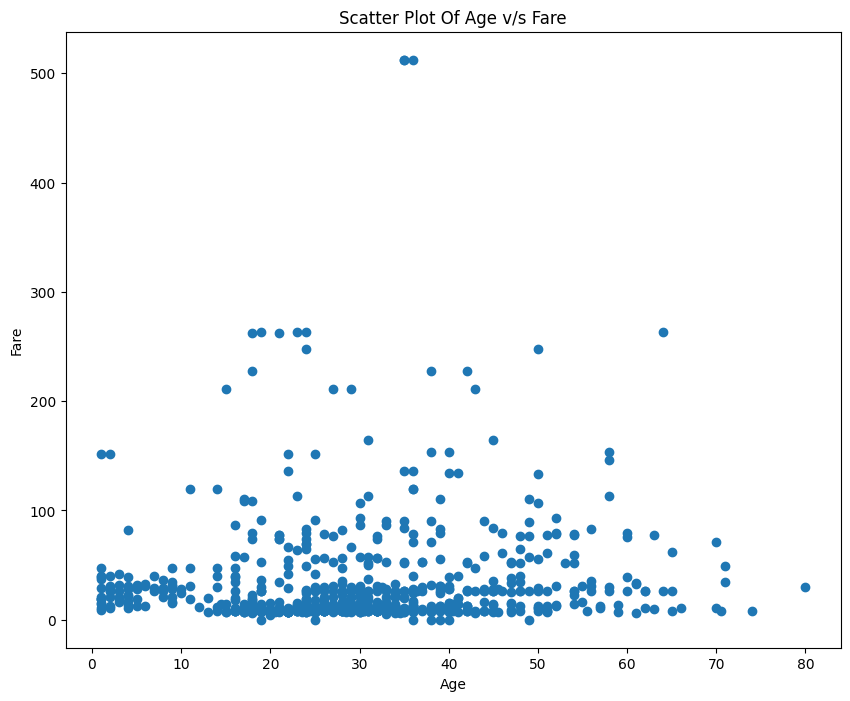

In [59]:
#Scatter plot of Age Vs Fare
plt.figure(figsize=(10, 8))
plt.scatter(data['Age'], data['Fare'])
plt.xlabel('Age')
plt.ylabel('Fare')
plt.title('Scatter Plot Of Age v/s Fare')
plt.show()